# Relatório de pré processamento do pi 6 semestre
### Este documento tem como finalidade explicar como foi realizado o pré processamento da base do pi

Aluno: Késsia Rodrigues Borges

A base utilizada é uma base com dados de pessoas diabéticas(2), não diabéticas(0) e pré diabéticas(1)
O objetivo do trabalho final é obter uma recomendação confiável, onde com base nos dados inputados pelo usuário, possa classificá-lo e recomendar bons hábitos

---

### 1. Inicialização e definição de atributos

```python
class PreProcessor:
    def __init__(self, path='diabetes_012_health_indicators_BRFSS2015.csv'):
        self.path = path
        self.colunas_irrelevantes = ['AnyHealthcare', 'NoDocbcCost', 'Income', 'Education']
        self.scaler = StandardScaler()
        self.df = pd.read_csv(self.path)
```

* **`self.path`**: caminho do arquivo de entrada.
* **`self.colunas_irrelevantes`**: lista das features que serão removidas por baixa relevância, baseada em análise de correlação.
* **`self.scaler`**: instância do `StandardScaler`, que normaliza as features para média 0 e desvio padrão 1.
* **`self.df`**: DataFrame com os dados carregados do arquivo CSV.

---

### 2. Análise de correlação

```python
def correlation(self):
    correlacao = self.df.corr()
    plt.figure(figsize=(14, 10))
    sns.heatmap(correlacao, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
    plt.title('Matriz de Correlação da Base de Diabetes')
    plt.show()
```

* **`self.df.corr()`**: calcula a matriz de correlação de Pearson entre todas as colunas numéricas do DataFrame.
* **Heatmap**: visualiza rapidamente relações lineares entre atributos e a variável alvo (`Diabetes_012`), embasando a exclusão de variáveis irrelevantes.

---

### 3. Pré-processamento e limpeza

```python
def pre_process(self, arquivo_saida):
    self.correlation()
    self.df = self.df.drop(columns=self.colunas_irrelevantes)
    valores_nulos = self.df.isnull().sum()
    print(valores_nulos)
    X = self.df.drop('Diabetes_012', axis=1)
    y = self.df['Diabetes_012']
    X_norm = self.scaler.fit_transform(X)
    self.df_normalizado = pd.DataFrame(X_norm, columns=X.columns)
    self.df_normalizado['Diabetes_012'] = y.reset_index(drop=True)
    self.df_normalizado.to_csv(arquivo_saida, index=False)
```

#### **Passos detalhados:**

1. **`self.correlation()`**: mostra a matriz de correlação antes da remoção das colunas.
2. **Remoção das colunas irrelevantes**: `self.df.drop(columns=self.colunas_irrelevantes)` elimina variáveis que não contribuem para a predição.
3. **Checagem de valores nulos**: `self.df.isnull().sum()` exibe a contagem de nulos por coluna, auxiliando na identificação de inconsistências.
4. **Separação de variáveis**:

   * `X = self.df.drop('Diabetes_012', axis=1)`: atributos preditores.
   * `y = self.df['Diabetes_012']`: variável alvo.
5. **Normalização**:

   * `self.scaler.fit_transform(X)` ajusta os dados para média 0 e desvio padrão 1, fundamental para métodos baseados em distância como KNN.
6. **Criação do DataFrame final**:

   * Junta os dados normalizados e a coluna alvo em um novo DataFrame.
7. **Exportação**:

   * `to_csv(arquivo_saida, index=False)` salva o resultado em CSV pronto para modelagem.



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

class PreProcessor:
	def __init__(self, path='diabetes_012_health_indicators_BRFSS2015.csv'):
			self.path = path
			self.colunas_irrelevantes = ['AnyHealthcare', 'NoDocbcCost', 'Income', 'Education']
			self.scaler = StandardScaler()
			self.df = pd.read_csv(self.path)

	def correlation(self): 
		# Aqui é exibida a matriz de correlação para julgar se faz sentido as colunas que serão excluídas, 
		# Com base nos dados obtidos no gráfico, remover as colunas ['AnyHealthcare', 'NoDocbcCost', 'Income', 'Education'] faz sentido
		correlacao = self.df.corr()
		plt.figure(figsize=(14, 10))
		sns.heatmap(correlacao, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
		plt.title('Matriz de Correlação da Base de Diabetes')
		plt.show()

	def pre_process(self, arquivo_saida): 
		# Exibe a correlação
		self.correlation()
		# Remove as colunas irrelevantes
		self.df = self.df.drop(columns=self.colunas_irrelevantes)
		valores_nulos = self.df.isnull().sum()

		# Exibir valores nulos
		print(valores_nulos)
		# Remove a classe
		X = self.df.drop('Diabetes_012', axis=1)
		y = self.df['Diabetes_012']

		# Verificando quantas instancias tem para cada classe
		y.value_counts()

		#Normaliza os dados
		X_norm = self.scaler.fit_transform(X)

		# Salva a base normalizada
		self.df_normalizado = pd.DataFrame(X_norm, columns=X.columns)
		self.df_normalizado['Diabetes_012'] = y.reset_index(drop=True)
		self.df_normalizado.to_csv(arquivo_saida, index=False)






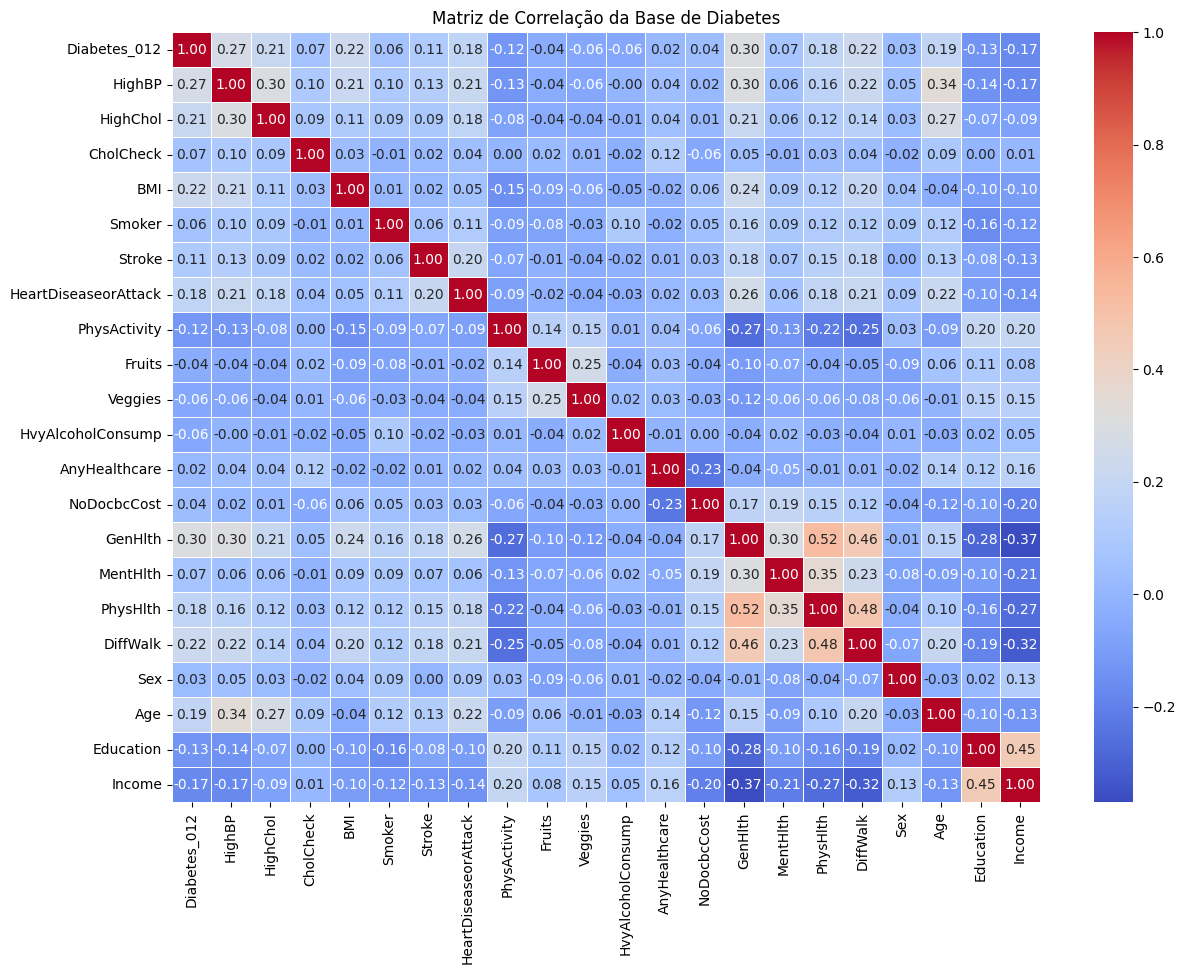

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
dtype: int64


In [8]:
pre_processor = PreProcessor()
pre_processor.pre_process("cleaned.csv")